<a href="https://www.kaggle.com/code/khanthtoonaing/flower-classification?scriptVersionId=159878072" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import os
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

# EDA

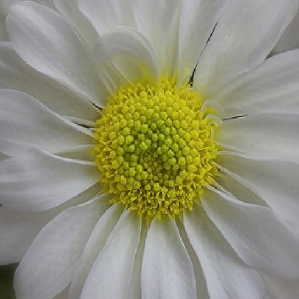

In [4]:
path = '/kaggle/input/flowers-dataset/train/daisy'
file_name = '100080576_f52e8ee070_n_jpg.rf.7304a94072d861e72591569a23415323.jpg'
img = load_img(f'{path}/{file_name}', target_size = (299,299))
img

In [5]:
input_dir = '/kaggle/input/flowers-dataset'
files = []
folders = ['train','test','valid']
classes = ['daisy','dandelion']
counts = []
for f in folders:
    for c in classes:
        for dirname, _, filenames in os.walk(f'{input_dir}/{f}/{c}'):
            for filename in filenames:
                files.append(os.path.join(dirname, filename))
        counts.append((f,c,len(files)))
        print(f'{len(files)} {c} classes are in the {f} directory.')

529 daisy classes are in the train directory.
1275 dandelion classes are in the train directory.
1352 daisy classes are in the test directory.
1457 dandelion classes are in the test directory.
1620 daisy classes are in the valid directory.
1821 dandelion classes are in the valid directory.


<Axes: xlabel='split', ylabel='count'>

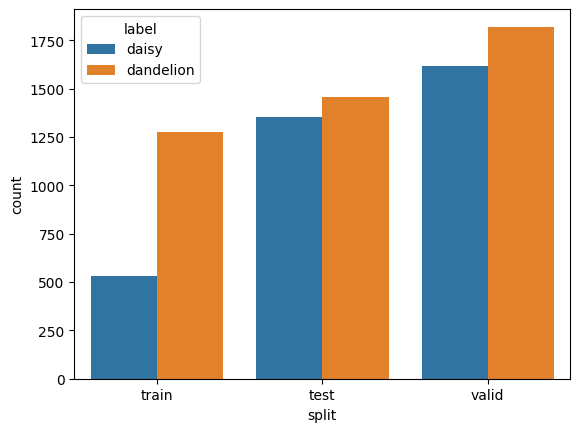

In [6]:
counts_df = pd.DataFrame(counts, columns = ['split','label','count'])
sns.barplot(counts_df, x = 'split', y = 'count', hue = 'label')

Found 1275 files belonging to 2 classes.


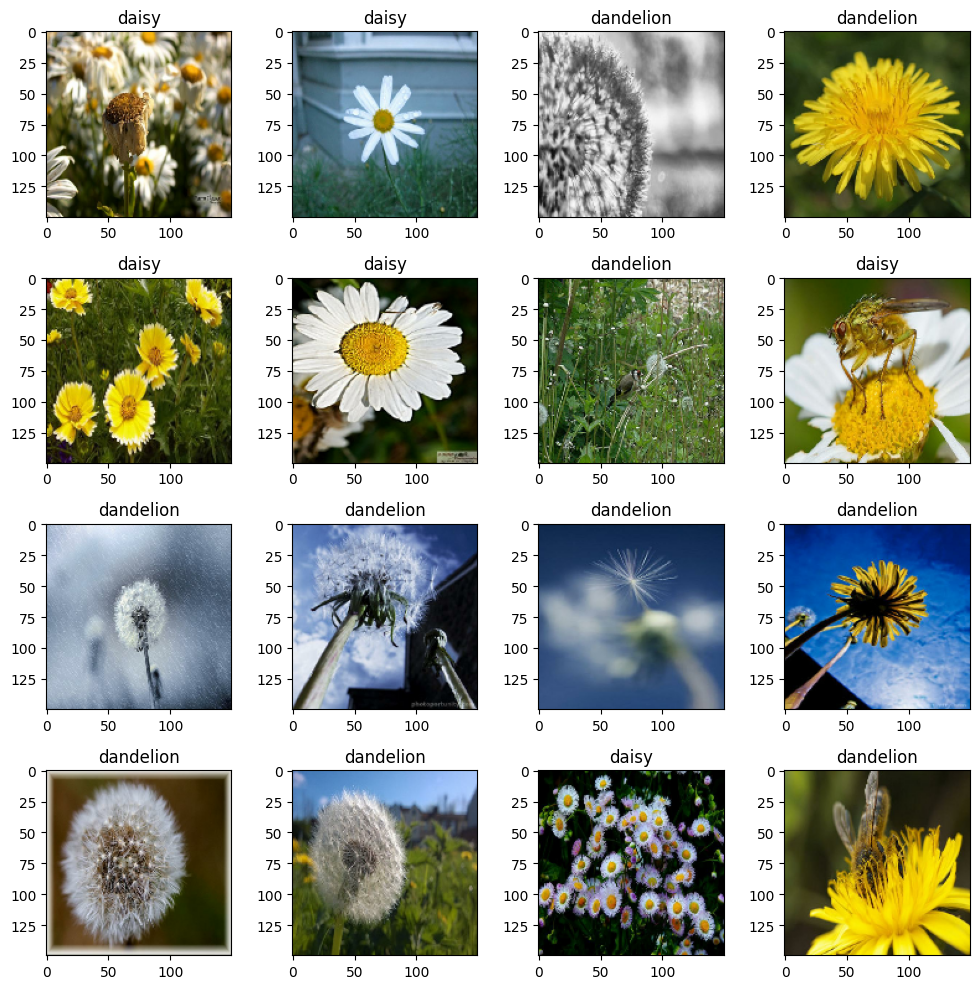

In [66]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/flowers-dataset/train",
    shuffle=True,
    image_size=(150,150)
)

class_names = train_dataset.class_names

plt.figure(figsize=(10,10))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i] / 255)
        plt.title(class_names[label_batch[i]])
plt.tight_layout()

# Data Preprocessing

In [8]:
IMG_SIZE = (150,150)
BATCH_SIZE = 32

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [10]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_df = train_gen.flow_from_directory(
    '/kaggle/input/flowers-dataset/train',
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode='binary'
)

val_df = val_gen.flow_from_directory(
    '/kaggle/input/flowers-dataset/valid',
    shuffle = True,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode='binary')

test_df = test_gen.flow_from_directory(
    '/kaggle/input/flowers-dataset/test',
    shuffle = True,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode='binary')

Found 1275 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


# Modelling

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.8),\
             metrics=keras.metrics.BinaryAccuracy())

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 32)                5607456   
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5608385 (21.39 MB)
Trainable params: 5608385 (21.39 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [14]:
for data_batch, labels_batch in train_df:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [15]:
history = model.fit(
    train_df,
    epochs=10,
    validation_data=val_df
)

Epoch 1/10
40/40 [==============================] - 10s 183ms/step - loss: 0.6682 - binary_accuracy: 0.5741 - val_loss: 0.6191 - val_binary_accuracy: 0.6181
Epoch 2/10
40/40 [==============================] - 4s 106ms/step - loss: 0.6045 - binary_accuracy: 0.6416 - val_loss: 0.6617 - val_binary_accuracy: 0.6016
Epoch 3/10
40/40 [==============================] - 4s 103ms/step - loss: 0.5646 - binary_accuracy: 0.7012 - val_loss: 0.5785 - val_binary_accuracy: 0.6731
Epoch 4/10
40/40 [==============================] - 4s 105ms/step - loss: 0.5433 - binary_accuracy: 0.7255 - val_loss: 0.5651 - val_binary_accuracy: 0.7005
Epoch 5/10
40/40 [==============================] - 4s 104ms/step - loss: 0.5114 - binary_accuracy: 0.7412 - val_loss: 0.5572 - val_binary_accuracy: 0.7033
Epoch 6/10
40/40 [==============================] - 4s 102ms/step - loss: 0.4931 - binary_accuracy: 0.7725 - val_loss: 0.5529 - val_binary_accuracy: 0.7088
Epoch 7/10
40/40 [==============================] - 4s 103ms/st

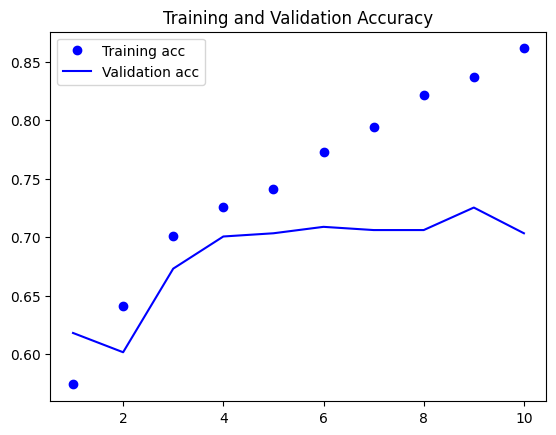

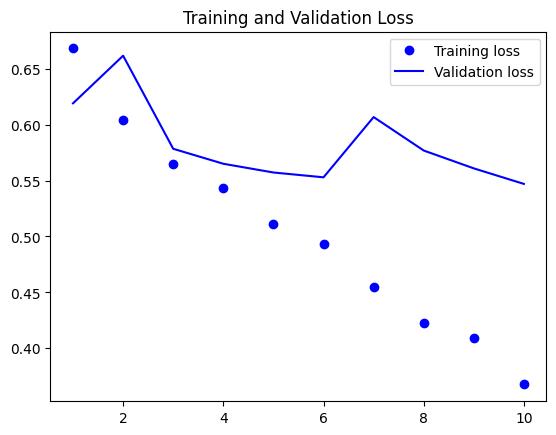

In [16]:
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [67]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3),
    classifier_activation='sigmoid',
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

inner = keras.layers.Dense(100, activation='relu')(vectors)
outputs = keras.layers.Dense(1)(inner)

model = keras.Model(inputs, outputs)

In [68]:
learning_rate = 0.001
optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
loss = keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

In [69]:
history = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
40/40 [==============================] - 6s 129ms/step - loss: 0.5035 - accuracy: 0.7812 - val_loss: 0.4774 - val_accuracy: 0.8324
Epoch 2/10
40/40 [==============================] - 4s 108ms/step - loss: 0.3704 - accuracy: 0.8533 - val_loss: 0.5278 - val_accuracy: 0.8242
Epoch 3/10
40/40 [==============================] - 5s 113ms/step - loss: 0.9768 - accuracy: 0.8078 - val_loss: 0.8554 - val_accuracy: 0.8077
Epoch 4/10
40/40 [==============================] - 4s 108ms/step - loss: 0.3135 - accuracy: 0.8949 - val_loss: 0.4756 - val_accuracy: 0.8489
Epoch 5/10
40/40 [==============================] - 4s 108ms/step - loss: 0.2427 - accuracy: 0.9035 - val_loss: 0.5789 - val_accuracy: 0.8599
Epoch 6/10
40/40 [==============================] - 5s 120ms/step - loss: 0.2276 - accuracy: 0.9247 - val_loss: 0.4706 - val_accuracy: 0.8544
Epoch 7/10
40/40 [==============================] - 5s 113ms/step - loss: 0.1911 - accuracy: 0.9310 - val_loss: 0.5940 - val_accuracy: 0.8709
Epoch 

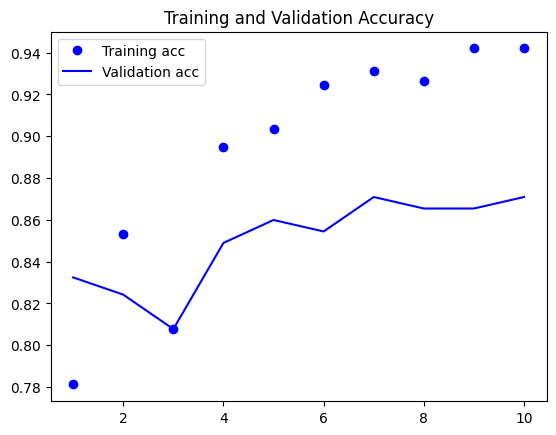

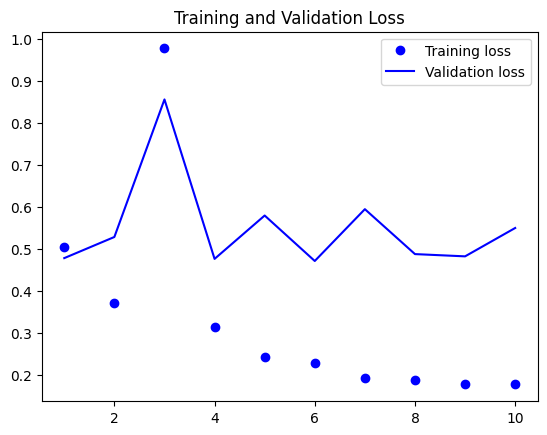

In [70]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

VGG16 is consistent although the accuracy might not be very high.

In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3),
    classifier_activation='sigmoid',
)

base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

inner = keras.layers.Dense(100, activation='relu')(vectors)
outputs = keras.layers.Dense(1)(inner)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 0s 0us/step


In [22]:
learning_rate = 0.001
optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
loss = keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

In [23]:
history = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
40/40 [==============================] - 10s 160ms/step - loss: 1.8354 - accuracy: 0.8384 - val_loss: 1.4655 - val_accuracy: 0.8379
Epoch 2/10
40/40 [==============================] - 4s 107ms/step - loss: 1.5575 - accuracy: 0.8690 - val_loss: 1.7407 - val_accuracy: 0.8599
Epoch 3/10
40/40 [==============================] - 4s 109ms/step - loss: 1.4388 - accuracy: 0.8839 - val_loss: 2.2537 - val_accuracy: 0.8269
Epoch 4/10
40/40 [==============================] - 4s 110ms/step - loss: 1.8669 - accuracy: 0.8565 - val_loss: 1.8641 - val_accuracy: 0.8709
Epoch 5/10
40/40 [==============================] - 5s 113ms/step - loss: 1.1122 - accuracy: 0.9122 - val_loss: 1.8262 - val_accuracy: 0.8599
Epoch 6/10
40/40 [==============================] - 4s 109ms/step - loss: 0.8491 - accuracy: 0.9310 - val_loss: 1.2679 - val_accuracy: 0.8984
Epoch 7/10
40/40 [==============================] - 5s 114ms/step - loss: 1.3585 - accuracy: 0.8965 - val_loss: 1.2564 - val_accuracy: 0.8984
Epoch

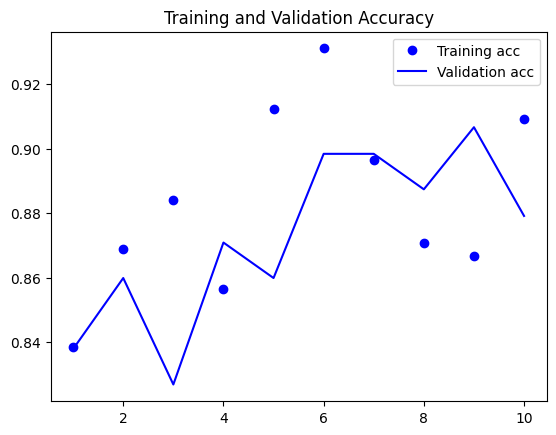

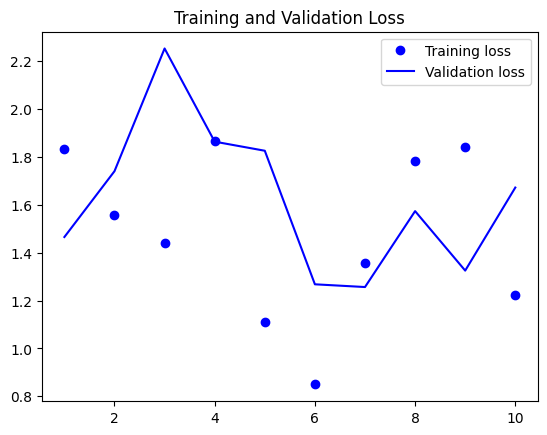

In [24]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Xception model is inconsistent and might be vulnerable to overfitting.

In [73]:
def make_model(learning_rate=0.001, size_inner = 100):
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3))

    base_model.trainable = False
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(1)(inner)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [76]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_df, epochs=10, validation_data=val_df)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
40/40 [==============================] - 6s 130ms/step - loss: 0.7770 - accuracy: 0.6463 - val_loss: 0.5270 - val_accuracy: 0.7198
Epoch 2/10
40/40 [==============================] - 4s 111ms/step - loss: 0.5660 - accuracy: 0.7365 - val_loss: 0.4856 - val_accuracy: 0.7610
Epoch 3/10
40/40 [==============================] - 4s 111ms/step - loss: 0.4734 - accuracy: 0.7710 - val_loss: 0.4306 - val_accuracy: 0.7995
Epoch 4/10
40/40 [==============================] - 5s 121ms/step - loss: 0.4280 - accuracy: 0.8102 - val_loss: 0.3937 - val_accuracy: 0.8214
Epoch 5/10
40/40 [==============================] - 5s 113ms/step - loss: 0.3950 - accuracy: 0.8243 - val_loss: 0.3730 - val_accuracy: 0.8242
Epoch 6/10
40/40 [==============================] - 5s 117ms/step - loss: 0.3681 - accuracy: 0.8408 - val_loss: 0.3600 - val_accuracy: 0.8214
Epoch 7/10
40/40 [==============================] - 5s 118ms/step - loss: 0.3408 - accuracy: 0.8424 - val_loss: 0.3461 - val_accuracy: 0.8352

learning_rate 0.001 is obivously the best considering loss and accuracy on both training and validation.

In [78]:
learning_rate = 0.001
scores = {}
for size_inner in [10,100,1000]:
    print(size_inner)
    model = make_model(learning_rate=learning_rate, size_inner = size_inner)

    history = model.fit(
        train_df,
        epochs=10,
        validation_data=val_df)
    scores[size_inner] = history.history
    print()
    print()

10
Epoch 1/10
40/40 [==============================] - 6s 118ms/step - loss: 0.6769 - accuracy: 0.7012 - val_loss: 0.5442 - val_accuracy: 0.7500
Epoch 2/10
40/40 [==============================] - 5s 112ms/step - loss: 0.4847 - accuracy: 0.7843 - val_loss: 0.5797 - val_accuracy: 0.7967
Epoch 3/10
40/40 [==============================] - 5s 113ms/step - loss: 0.7250 - accuracy: 0.7671 - val_loss: 0.4328 - val_accuracy: 0.8159
Epoch 4/10
40/40 [==============================] - 5s 112ms/step - loss: 0.3607 - accuracy: 0.8251 - val_loss: 0.4879 - val_accuracy: 0.8379
Epoch 5/10
40/40 [==============================] - 5s 114ms/step - loss: 0.3294 - accuracy: 0.8392 - val_loss: 0.7988 - val_accuracy: 0.7720
Epoch 6/10
40/40 [==============================] - 4s 110ms/step - loss: 0.3314 - accuracy: 0.8384 - val_loss: 0.3794 - val_accuracy: 0.8379
Epoch 7/10
40/40 [==============================] - 4s 111ms/step - loss: 0.2797 - accuracy: 0.8627 - val_loss: 0.3609 - val_accuracy: 0.8489
Epo

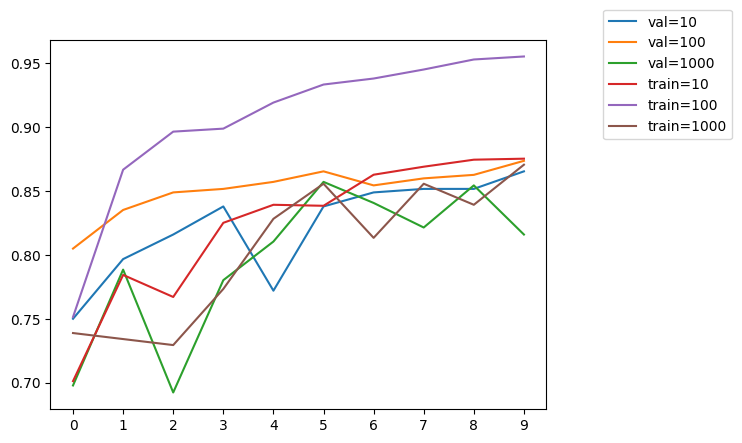

In [79]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

for size, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % size))

plt.xticks(np.arange(10))
plt.legend(bbox_to_anchor=(1.1,1.1))

Size 100 have the best validation accuracy result.

In [81]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'vgg16_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [82]:
def make_model(learning_rate=0.001, size_inner = 100):
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3))

    base_model.trainable = False
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(1)(inner)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [83]:
learning_rate = 0.001
size_inner = 10
model = make_model(learning_rate=learning_rate, 
                   size_inner=size_inner)
history = model.fit(
    train_df,
    epochs=10,
    validation_data=val_df,
    callbacks=[checkpoint])
print()
print()

Epoch 1/10
40/40 [==============================] - 6s 127ms/step - loss: 0.5615 - accuracy: 0.7553 - val_loss: 0.4422 - val_accuracy: 0.8269
Epoch 2/10


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 5s 120ms/step - loss: 0.3806 - accuracy: 0.8298 - val_loss: 0.3780 - val_accuracy: 0.8462
Epoch 3/10
40/40 [==============================] - 5s 120ms/step - loss: 0.3590 - accuracy: 0.8408 - val_loss: 0.3623 - val_accuracy: 0.8516
Epoch 4/10
40/40 [==============================] - 5s 115ms/step - loss: 0.2883 - accuracy: 0.8737 - val_loss: 0.4343 - val_accuracy: 0.8516
Epoch 5/10
40/40 [==============================] - 5s 116ms/step - loss: 0.2672 - accuracy: 0.8800 - val_loss: 0.3838 - val_accuracy: 0.8571
Epoch 6/10
40/40 [==============================] - 5s 113ms/step - loss: 0.2582 - accuracy: 0.8824 - val_loss: 0.3757 - val_accuracy: 0.8681
Epoch 7/10
40/40 [==============================] - 4s 111ms/step - loss: 0.2359 - accuracy: 0.8894 - val_loss: 0.3754 - val_accuracy: 0.8681
Epoch 8/10
40/40 [==============================] - 5s 113ms/step - loss: 0.2218 - accuracy: 0.8933 - val_loss: 0.3340 - val_accuracy: 0.8709
Epoch 9/10
40/40 

# Evaluation

In [84]:
!ls /kaggle/working

vgg16_v1_01_0.731.h5  vgg16_v1_10_0.868.h5  vgg16_v2_06_0.868.h5
vgg16_v1_02_0.821.h5  vgg16_v2_01_0.827.h5  vgg16_v2_08_0.871.h5
vgg16_v1_05_0.852.h5  vgg16_v2_02_0.846.h5  vgg16_v2_10_0.874.h5
vgg16_v1_06_0.863.h5  vgg16_v2_03_0.852.h5
vgg16_v1_09_0.865.h5  vgg16_v2_05_0.857.h5


In [85]:
model = keras.models.load_model('vgg16_v2_10_0.874.h5')

In [86]:
model.evaluate(test_df)

6/6 [==============================] - 1s 107ms/step - loss: 0.4292 - accuracy: 0.8681


[0.4292123019695282, 0.8681318759918213]

Accuracy is 86.8% which is pretty acceptable.

Found 182 files belonging to 2 classes.
1/1 [==============================] - 0s 24ms/step


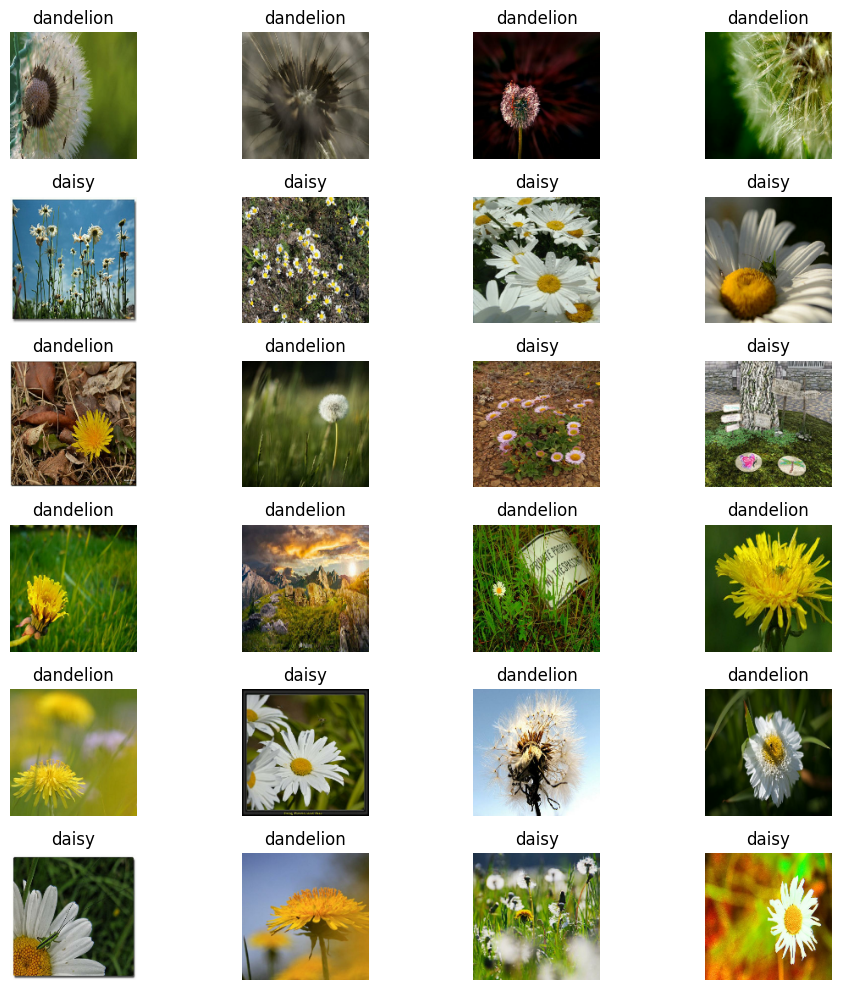

In [87]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/flowers-dataset/test",
    shuffle=True,
    image_size=(150,150)
)

class_names = test_dataset.class_names
plt.figure(figsize = (10,10))
for image_batch, _ in test_dataset.take(1):
    for i in range(24):
        x = np.array(image_batch[i])
        X = np.array([x])
        X = preprocess_input(X)
        pred = model.predict(X)
        pred = 1 if (pred>=0.5) else 0
        actual = class_names[label_batch[i]]
        plt.subplot(6, 4, i+1)
        plt.imshow(image_batch[i] / 255)
        plt.title(class_names[pred])
        plt.axis("off")
plt.tight_layout()

Prediction works well for most of the images

In [88]:
from IPython.display import FileLink
FileLink(r'vgg16_v2_10_0.874.h5')

/kaggle/working/vgg16_v2_10_0.874.h5